In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
df=pd.read_csv(r'F:\Experiences1.csv')
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [20]:
df.drop(['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  999 non-null    object
 1   Is_Response  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [22]:
df.isnull().sum()

Description    0
Is_Response    0
dtype: int64

In [23]:
# Creating dictionary
dict={'happy':0,'not happy':1}
# Mapping dictionary to Is_Response feature
df['class']=df['Is_Response'].map(dict)
df.head( )

,Description,Is_Response,class
0,The room was kind of clean but had a VERY stro...,not happy,1
1,I stayed at the Crown Plaza April -- - April -...,not happy,1
2,I booked this hotel through Hotwire at the low...,not happy,1
3,Stayed here with husband and sons on the way t...,happy,0
4,My girlfriends and I stayed here to celebrate ...,not happy,1


In [24]:
df.drop(['Is_Response'],axis=1,inplace=True)
df.head( )

,Description,class
0,The room was kind of clean but had a VERY stro...,1
1,I stayed at the Crown Plaza April -- - April -...,1
2,I booked this hotel through Hotwire at the low...,1
3,Stayed here with husband and sons on the way t...,0
4,My girlfriends and I stayed here to celebrate ...,1


In [25]:
# Text Preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]',' ', df['Description'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
corpus[15]


'stay elan th th octob like much return day trip vega anoth night unassum appear hotel score heavili great locat spotlessli clean classic design comfort bedroom friendli manag staff jorg colleagu front desk revel untir enthusiast help recommend great restaur place visit etc manag particularli help let us complimentari room post check freshen even flight home long day enjoy southern cal sunshin'

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
tfidf_word=tfidf.fit_transform(corpus).toarray()
tfidf_class=df["class"]
df['class'].value_counts()

0    666
1    333
Name: class, dtype: int64

In [28]:
def remove_special_chars(text):
    for remove in map(lambda r: re.compile(re.escape(r)), [',', ':', "=", "&", ";", '%', '$','@', '%', '^', '*', '(', ')', '{', '}','[', ']', '|', '/', '\\', '>', '<', '-','!', '?', '.',' — ', ' — — ', '#'," ' " ,"\""]):
        text.replace(remove, '', inplace=True)
    return text

In [29]:
def remove_tags(text):
    return re.compile( r' <[^>]+> ').sub(' ', text)

In [30]:
def remove_num(text):
    return ''.join(re.sub(r'([0–9+])',' ',text))

In [31]:
final_df=df.copy( )
#remove tags
final_df.Description=final_df.Description.apply(lambda x : remove_tags(x))
#remove numbers
final_df.Description=final_df.Description.apply(lambda x : remove_num(x))
#remove special charcters
remove_special_chars(final_df.Description)

0      The room was kind of clean but had a VERY stro...
1      I stayed at the Crown Plaza April   April   Th...
2      I booked this hotel through Hotwire at the low...
3      Stayed here with husband and sons on the way t...
4      My girlfriends and I stayed here to celebrate ...
                             ...                        
994    I stayed at Lowell during a business trip\nThe...
995    This hotel was reasonably priced and in a good...
996    I just returned from a three night stay in The...
997    Simply it's a great hotel The staff was incred...
998    I stay at the Figueroa whenever I am in LA It ...
Name: Description, Length: 999, dtype: object

In [32]:
import tensorflow as tf
from keras import preprocessing
import keras
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')
tokenizer.fit_on_texts(final_df["Description"])
X = tokenizer.texts_to_sequences(final_df["Description"])
X = keras.preprocessing.sequence.pad_sequences(X,maxlen=100)
print(X[500])#changng into 500

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   26  334    2    6   50    7    3  375   13
   19    3  582   79 2060    3   22 1287   12   19  154 1995 3482 4212
    4    1  169   63    6    5    3  473    7   27   13    2    6  622
    1   12   31    3  456    6   57  402  407    3  105   78   10    3
   12   19  372    3  327 1245 2060    3  105  101   32    1  113  111
  632   54  103  202   75 1105    7    1 1070  612    6  277    1   12
  115   78]


In [33]:
y= df['class']

In [34]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

9379

In [35]:
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 24)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers.recurrent import LSTM

embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 40)           375160    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 431,661
Trainable params: 431,661
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test, Y_test), )

Epoch 1/20
22/22 [==============================] - 4s 170ms/step - loss: 0.6582 - accuracy: 0.6567 - val_loss: 0.6429 - val_accuracy: 0.6500
Epoch 2/20
22/22 [==============================] - 3s 115ms/step - loss: 0.6058 - accuracy: 0.6738 - val_loss: 0.6138 - val_accuracy: 0.6500
Epoch 3/20
22/22 [==============================] - 3s 123ms/step - loss: 0.5059 - accuracy: 0.7167 - val_loss: 0.5303 - val_accuracy: 0.7600
Epoch 4/20
22/22 [==============================] - 2s 112ms/step - loss: 0.4166 - accuracy: 0.8999 - val_loss: 0.5747 - val_accuracy: 0.6833
Epoch 5/20
22/22 [==============================] - 2s 109ms/step - loss: 0.2454 - accuracy: 0.9142 - val_loss: 0.4755 - val_accuracy: 0.7700
Epoch 6/20
22/22 [==============================] - 2s 110ms/step - loss: 0.1273 - accuracy: 0.9671 - val_loss: 0.5119 - val_accuracy: 0.7733
Epoch 7/20
22/22 [==============================] - 2s 109ms/step - loss: 0.0701 - accuracy: 0.9843 - val_loss: 0.5830 - val_accuracy: 0.7433
Epoch 

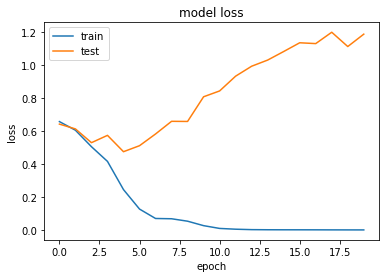

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

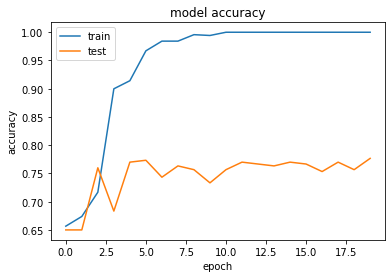

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
# New review
string11=''' i had handicapped family and they put us in the very end of the hallway. we stayed on -nd floor the ice machine didnt work. the hallways were extremely dark and the hotel smelled like dog urine and wet dog. our room was pretty dark even with curtains open. the carpets and bedspreads had cigarette burns all over. the refrigerator made a terrible sound at night. i found small roaches in the bathroom. and asked for deoderizer to be sprayed in the room while we were gone. that didnt happen. i needed to use the business center and had to argue to get the key for it on - occasions. the dayshift had given me a receipt with password for it and the night shift says we know nothing about it. they finally gave in & gave me the key. housekeeping couldnt speak english so i had to ask the front desk for our room to smell better. the cont breakfast were dried out donuts. needless to say we went to the double t for all but one breakfast. no mgmt ever helped me out with our problems or would give in on some reimbursement. i did write a letter after we returned and got a letter back thanking me for my comments and now they knew some things needed improved on. i wont stay there again. planning another trip in oct and will be staying at the comfort inn next door'''
# Evaluating trained mode with new review
x_1=tokenizer.texts_to_sequences([string11])
x_1 = keras.preprocessing.sequence.pad_sequences(x_1,maxlen=100)
if(model.predict(x_1)<=0.5):
    print("Happy")
else:
    print("Not Happy")

Not Happy


In [55]:
# New review
string22='''  We had a lovely suite with a great location to all the tourist areas. We had already checked out the day the blackout occurred and were scheduled to take a night train home. Unfortunately the trains are electric and couldn't get into New York! The staff at the Wyndham were great. They checked us back in and gave us a room with a view, helped us find out about Amtrak, etc. As it turned out the next AM there were still no trains South (and by now a lot of people had been flying into Logan because NYC was closed) but we did find out trains were running out of Manhattan South (we needed to get the Wilmington, Delaware). It was like the Amazing Race! Everyone trying to get out of town. We ended up taking a Greyhound to NYC and were able to get a train home. It cost us about an additional $---- but it could have been worse. Only down side was the staff didn't know much about the package deal I booked which was supposed to include nightly popcorn and sodas for the kids. ALso I was charged $--.-- for a - min phone call home (I stupidly left my calling card at home). I would recommend this Hotel to anyone!'''
# Evaluating trained mode with new review
x_2=tokenizer.texts_to_sequences([string22])
x_2= keras.preprocessing.sequence.pad_sequences(x_2,maxlen=100)
if(model.predict(x_2)<=0.5):
    print("Happy")
else:
    print("Not Happy")

Happy
